ML Basics revision and Insurance cost prediction

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loading the dataset and checking the labels

In [ ]:
df=pd.read_csv('insurance.csv');

In [ ]:
print(df);

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


give the first 5 rows of the dataset

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In this dataset we have 7 columns in which are called features.
of which we have 3 categorial features:

*   sex
*   smoker
*   region

charges is our the target variable which we will be predicting

In [ ]:
# total number of rows and columns
df.shape

(1338, 7)

basic info about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# checking for missing values if any
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 500x500 with 0 Axes>

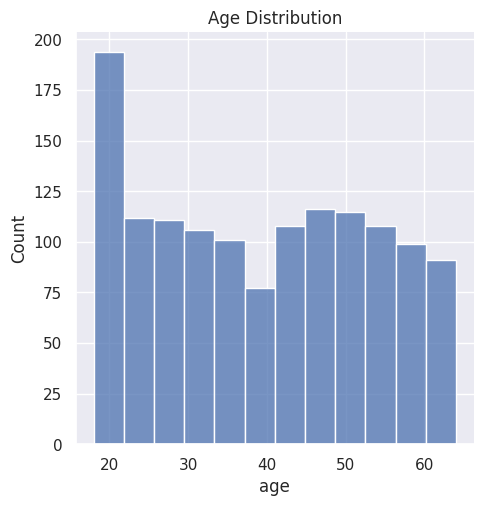

In [ ]:
# distribution of age values

sns.set() # loads the library's default theme and color palette

plt.figure(figsize=(5,5)) #figure size

sns.displot(df['age']) #function in the Seaborn library that creates distribution plots

plt.title('Age Distribution') #setting the title of the plot

plt.show()
# starts an event loop, looks for all currently active figure objects,
# and opens one or more interactive windows that display your figure or figures

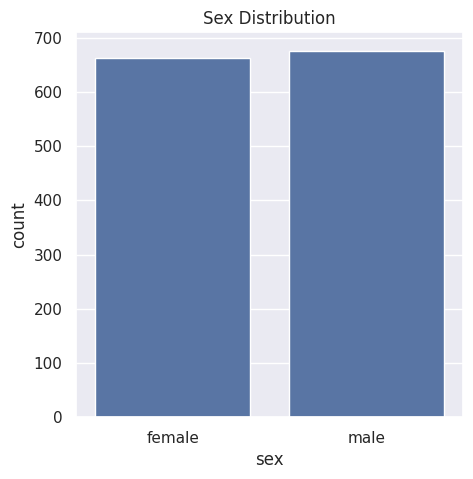

In [ ]:
# gender column analysis

plt.figure(figsize=(5,5)) #figure size

sns.countplot(x='sex',data=df)
# a type of visualization in Python's Seaborn library that displays the
# number of observations within each category of a categorical variable

plt.title('Sex Distribution') #title

plt.show() #plotting the graph



In [ ]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


<Figure size 500x500 with 0 Axes>

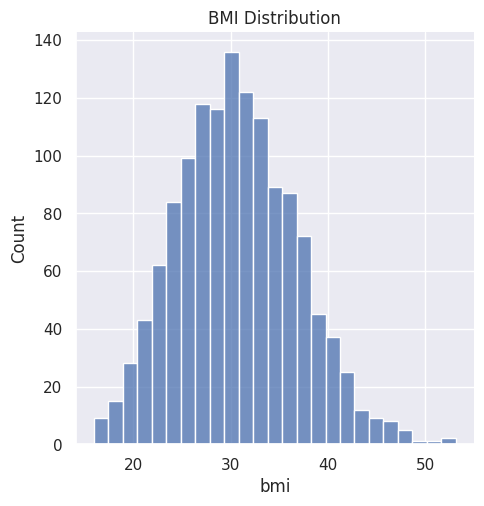

In [ ]:
#bmi distribution
plt.figure(figsize=(5,5))
sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

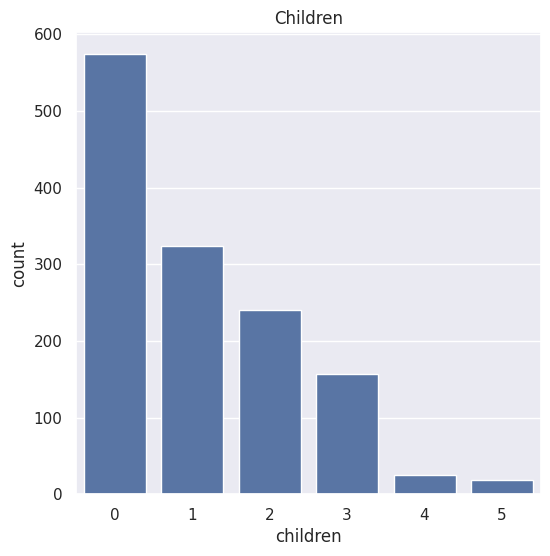

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=dfildren')
plt.show()

In [ ]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


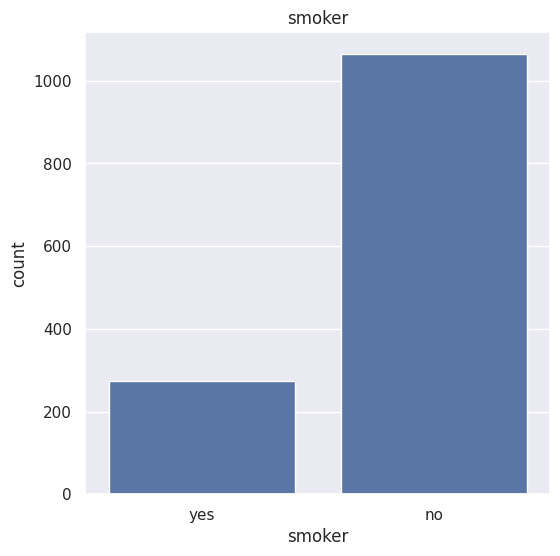

In [ ]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


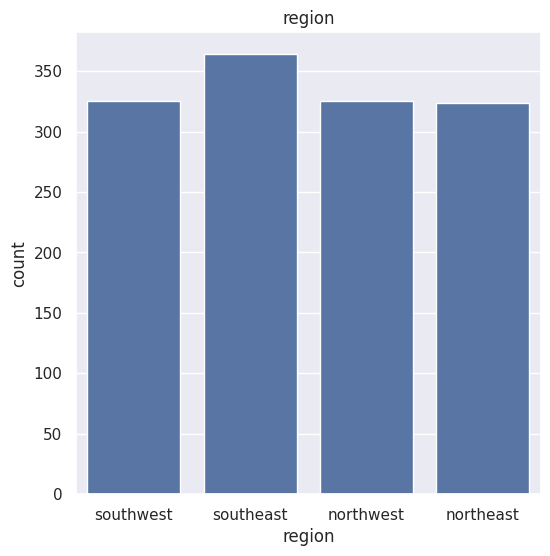

In [ ]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Figure size 600x600 with 0 Axes>

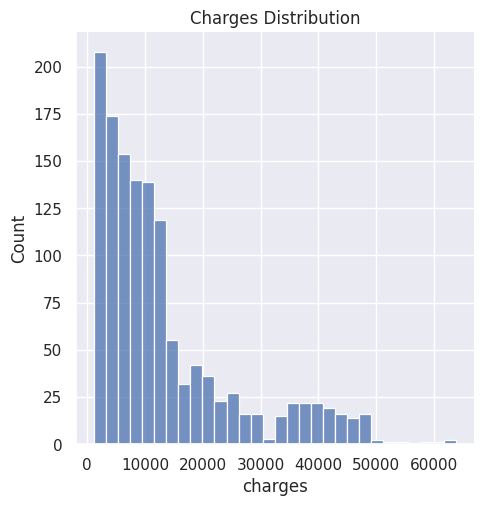

In [ ]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [ ]:
# Data Pre-Processing

# Encoding the categorical features

In [ ]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

/tmp/ipython-input-47-3055851464.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}}, inplace=True)
/tmp/ipython-input-47-3055851464.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
/tmp/ipython-input-47-3055851464.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior,

Splitting the Features and Target

In [ ]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
# Splitting the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

NameError: name 'train_test_split' is not defined

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [ ]:
# Model Training

# Linear Regression

In [ ]:
# loading the Linear Regression model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

In [ ]:
Model Evaluation

In [ ]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

In [ ]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

In [ ]:
# Building a Predictive System
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])